# Loading the dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = '/content/drive/MyDrive/CovidDataset'

# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
#Defining paths
TRAIN_PATH = "/content/drive/MyDrive/CovidDataset/Train"
VAL_PATH = "/content/drive/MyDrive/CovidDataset/Val"

# Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

### Augmenting Image Data

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
test_datagen = image.ImageDataGenerator(rescale=1./255)

### Reading the images from the directory to create batches

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 86s 12s/step - loss: 2.1319 - accuracy: 0.4547 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 82s 12s/step - loss: 0.6687 - accuracy: 0.6305 - val_loss: 0.6638 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 82s 12s/step - loss: 0.5624 - accuracy: 0.7517 - val_loss: 0.4095 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 82s 12s/step - loss: 0.3859 - accuracy: 0.8352 - val_loss: 0.2763 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 82s 12s/step - loss: 0.3420 - accuracy: 0.8451 - val_loss: 0.3071 - val_accuracy: 0.9000
Epoch 6/10
7/7 [==============================] - 82s 12s/step - loss: 0.3110 - accuracy: 0.8763 - val_loss: 0.1881 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 82s 12s/step - loss: 0.1516 - accuracy: 0.9476 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 8/10
7/7 [===========

In [ ]:
summary=hist.history
print(summary)

{'loss': [1.6805907487869263, 0.6571878790855408, 0.5300593376159668, 0.3788985311985016, 0.34644100069999695, 0.28044062852859497, 0.17675341665744781, 0.17470301687717438, 0.14867202937602997, 0.10783378779888153], 'accuracy': [0.4866071343421936, 0.625, 0.7455357313156128, 0.8303571343421936, 0.8526785969734192, 0.9017857313156128, 0.9285714030265808, 0.9508928656578064, 0.9419642686843872, 0.9732142686843872], 'val_loss': [0.6961498260498047, 0.6637904644012451, 0.40945273637771606, 0.2762714922428131, 0.30705511569976807, 0.18812258541584015, 0.10990088433027267, 0.07370379567146301, 0.07312442362308502, 0.05177419260144234], 'val_accuracy': [0.5, 0.5, 0.9333333373069763, 0.949999988079071, 0.8999999761581421, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053, 0.9833333492279053]}


### Evaluating Training Set

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.08431758731603622, 0.9642857313156128]

### Evaluating Validation Set

In [ ]:
print(model.evaluate_generator(validation_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05177419260144234, 0.9833333492279053]


### Class Identification

In [ ]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

### Visualizing Loss/Accuracy vs Epoch for the Training and the Validation Set

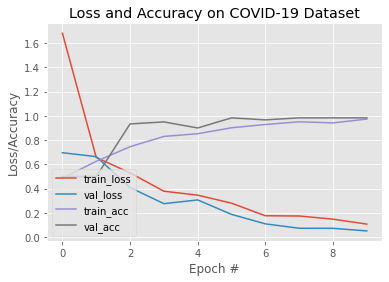

In [ ]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# Using LIME to explain the model prediction

### Predict the Classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


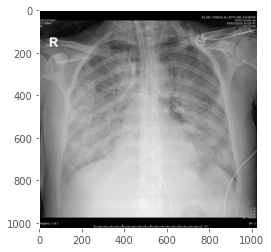

Predicted Class: Covid
Prediction Score:  0.003989488
Expected Class: Covid


In [ ]:
import skimage
import skimage.transform
from skimage import io
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams["axes.grid"] = False

img_path = '/content/drive/MyDrive/CovidDataset/Val/Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg'
plt_img=mpimg.imread(img_path)


def transform_image(img_path):

    img = skimage.io.imread(img_path)
    img = skimage.transform.resize(img, (224,224,3))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = transform_image(img_path)

preds = model.predict(images)
prediction_class = model.predict_classes(images)
prediction = np.argmax(preds)
prediction_score = np.max(preds)
if prediction_class == 0:
    txt = "Covid"
else:
    txt = "Normal"
plt.imshow(plt_img)
plt.show()
print("Predicted Class: "+txt)
print("Prediction Score: ",prediction_score)
print("Expected Class: "+"Covid")

### Install Lime

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image

### Creating an Explainer object

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=2, hide_color=0, num_samples=1000)


### Visualizing the Explanation

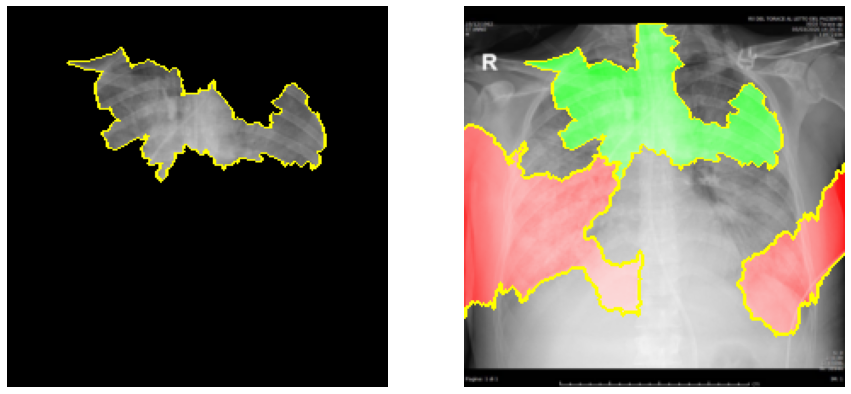

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')

### Let's strengthen our trust, by looking at the explanation for some more images

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


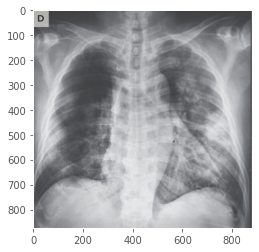

Predicted Class: Covid
Prediction Score:  0.030975372
Expected Class: Covid


In [ ]:
img_path = '/content/drive/MyDrive/CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'
plt_img=mpimg.imread(img_path)

images = transform_image(img_path)

preds = model.predict(images)
prediction_class = model.predict_classes(images)
prediction = np.argmax(preds)
prediction_score = np.max(preds)
if prediction_class == 0:
    txt = "Covid"
else:
    txt = "Normal"
plt.imshow(plt_img)
plt.show()
print("Predicted Class: "+txt)
print("Prediction Score: ",prediction_score)
print("Expected Class: "+"Covid")

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=2, hide_color=0, num_samples=1000)


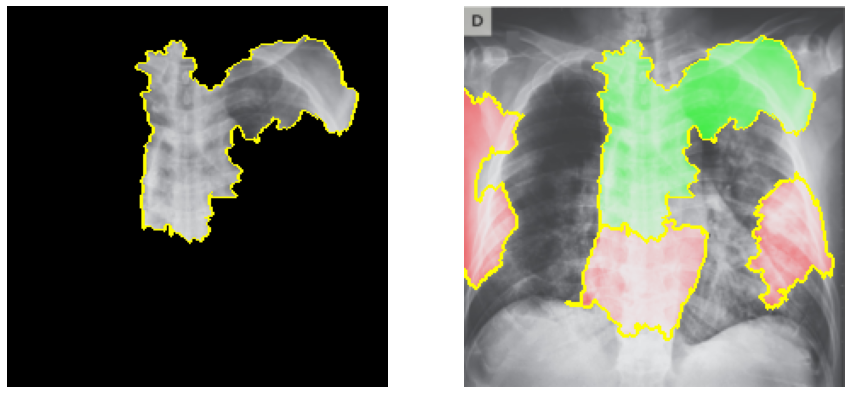

In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


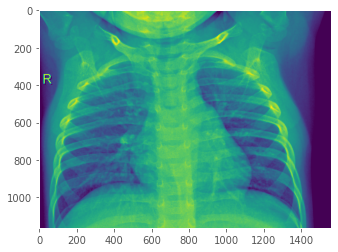

Predicted Class: Normal
Prediction Score:  0.9972322
Expected Class: Normal


In [ ]:
img_path = '/content/drive/MyDrive/CovidDataset/Val/Normal/NORMAL2-IM-0851-0001-0001.jpeg'
plt_img=mpimg.imread(img_path)

images = transform_image(img_path)

preds = model.predict(images)
prediction_class = model.predict_classes(images)
prediction = np.argmax(preds)
prediction_score = np.max(preds)
if prediction_class == 0:
    txt = "Covid"
else:
    txt = "Normal"
plt.imshow(plt_img)
plt.show()
print("Predicted Class: "+txt)
print("Prediction Score: ",prediction_score)
print("Expected Class: "+"Normal")

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=2, hide_color=0, num_samples=1000)


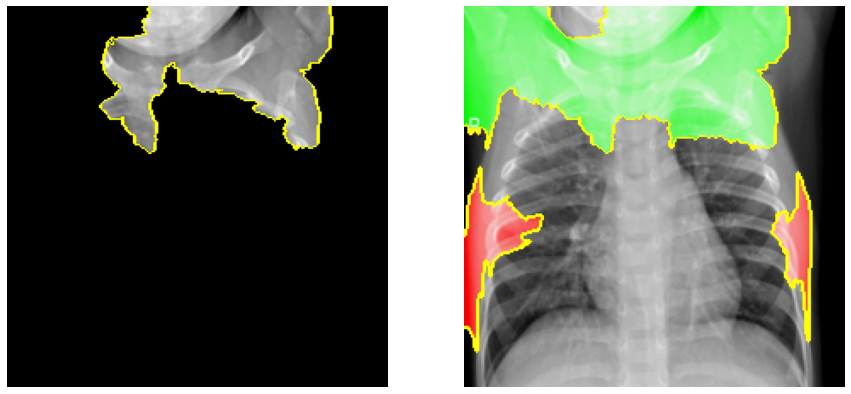

In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


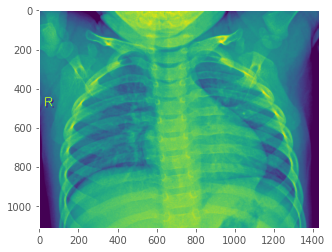

Predicted Class: Normal
Prediction Score:  0.9847773
Expected Class: Normal


In [ ]:
img_path = '/content/drive/MyDrive/CovidDataset/Val/Normal/NORMAL2-IM-0914-0001.jpeg'
plt_img=mpimg.imread(img_path)

images = transform_image(img_path)

preds = model.predict(images)
prediction_class = model.predict_classes(images)
prediction = np.argmax(preds)
prediction_score = np.max(preds)
if prediction_class == 0:
    txt = "Covid"
else:
    txt = "Normal"
plt.imshow(plt_img)
plt.show()
print("Predicted Class: "+txt)
print("Prediction Score: ",prediction_score)
print("Expected Class: "+"Normal")

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=2, hide_color=0, num_samples=1000)


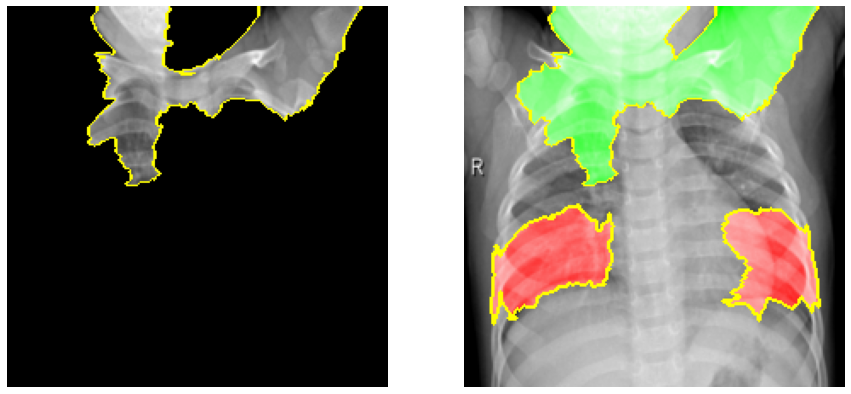

In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')